# AI-Driven Stability Forecasting in Smart Grids

<img src="D:\edunet_foundation\Learning\ICBP\Project\smart-grids\smart-grids.jpg" alt="chatbot" width="1100" height="500">

### Importing essential libraries

In this exercise, traditional libraries for tensor manipulation, mathematical operations, and graphics are used, along with three scikit-learn modules—StandardScaler (scaling), confusion_matrix (model performance metric), and KFold (cross-validation). Additionally, two Keras objects, Sequential and Dense, are utilized for deep learning.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold

from keras.models import Sequential
from keras.layers import Dense, Input

from datetime import datetime

### Importing required datasets into dataframes

The augmented dataset with 60,000 observations is imported, the dependent variable is mapped ('stable' = 1, 'unstable' = 0), and the data is shuffled.

In [ ]:
# loading data file

sns.set()
start_time = datetime.now()
data = pd.read_csv('/content/smart_grid_stability_augmented.csv')
data.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [ ]:
# label encoding preparation
map1 = {'unstable': 0, 'stable': 1}
data['stabf'] = data['stabf'].replace(map1).astype(int)  # Explicitly cast to int

# Shuffle the data
data = data.sample(frac=1)

## 5. Exploratory data analysis

The dataset reveals shuffled observations and a strong correlation between the dependent variables 'stab' and 'stabf'.

In [ ]:
data.tail()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
47362,1.573123,9.076316,0.785927,9.779448,2.972577,-1.408765,-1.004491,-0.559321,0.609706,0.453480,0.700095,0.937014,-0.007261,1
22321,7.140552,1.959945,4.573262,9.232084,4.799175,-0.914318,-1.917917,-1.966940,0.835889,0.831431,0.585262,0.982374,0.057294,0
25504,2.646003,3.271168,4.805914,4.647210,4.968584,-1.912871,-1.991226,-1.064487,0.397594,0.067576,0.118426,0.985368,-0.006000,1
697,3.313111,9.165155,7.190974,5.664069,2.975237,-1.412889,-0.897971,-0.664377,0.761464,0.258496,0.357072,0.342721,0.008538,0
41119,7.369597,6.276536,9.068401,5.874177,2.933012,-0.984631,-0.639527,-1.308854,0.362830,0.642167,0.112540,0.301269,0.021500,0


In [ ]:
data.describe()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,5.250000,5.250001,5.250001,5.250001,3.750000,-1.250000,-1.250000,-1.250000,0.525000,0.525000,0.525000,0.525000,0.015731,0.362000
std,2.742434,2.742437,2.742437,2.742437,0.752129,0.433017,0.433017,0.433017,0.274244,0.274243,0.274243,0.274243,0.036917,0.480583
min,0.500793,0.500141,0.500141,0.500141,1.582590,-1.999945,-1.999945,-1.999945,0.050009,0.050028,0.050028,0.050028,-0.080760,0.000000
25%,2.874892,2.875011,2.875011,2.875011,3.218300,-1.624997,-1.624997,-1.624997,0.287521,0.287497,0.287497,0.287497,-0.015557,0.000000
50%,5.250004,5.249981,5.249981,5.249981,3.751025,-1.249996,-1.249996,-1.249996,0.525009,0.525007,0.525007,0.525007,0.017142,0.000000
75%,7.624690,7.624896,7.624896,7.624896,4.282420,-0.874993,-0.874993,-0.874993,0.762435,0.762490,0.762490,0.762490,0.044878,1.000000
max,9.999469,9.999837,9.999837,9.999837,5.864418,-0.500025,-0.500025,-0.500025,0.999937,0.999982,0.999982,0.999982,0.109403,1.000000


Here, we can observe that mean values for following groups are almost same -

> Group 1 - tau1, tau2, tau3, tau4 - **5.25**

> Group 2 - p2, p3, p4 - **-1.25**

> Group 3 - g1, g2, g3, g4 - **0.525**

That reflects their other statistical values(e.g. min, max, 25%, etc.) are also same.

### Feature assessment

**Assessment Function:**

Creates a histogram and a scatter plot for a dependent-independent variable pair from a DataFrame. Optionally, highlights a specific observation in red and skips the scatter plot if no independent variable is provided.
    
**Keyword arguments:**
    
- f_data: Tensor containing the dependent / independent variable pair (Pandas dataframe)
- f_y_feature:Dependent variable designation. (String)
- f_x_feature: Independent variable designation. (String)
- f_index:If greater or equal to zero, the observation denoted by f_index will be plotted in red. (Integer)
                


In [ ]:
def assessment(f_data, f_y_feature, f_x_feature, f_index=-1):

    # Define color for scatter plot points
    f_color = 'b'  # Default color for all points
    if f_index >= 0:
        f_color = ['r' if idx == f_index else 'g' for idx in f_data.index]

    # Create subplots
    f_fig, f_a = plt.subplots(1, 2, figsize=(16, 4))

    # Plot histogram (using `histplot` instead of `distplot`)
    sns.histplot(f_data[f_x_feature], ax=f_a[0], color='g', kde=False)
    f_a[0].set_xlabel(f_x_feature, fontsize=10)

    # Plot scatter plot
    if f_index >= 0:
        f_a[1].scatter(f_data[f_x_feature], f_data[f_y_feature], c=f_color, edgecolors='w')
    else:
        sns.scatterplot(x=f_x_feature, y=f_y_feature, data=f_data, ax=f_a[1], color='b')

    f_a[1].set_xlabel(f_x_feature, fontsize=10)
    f_a[1].set_ylabel(f_y_feature, fontsize=10)

    plt.show()

<p style="text-align: justify">Distribution patterns and the relationship with the 'stab' dependent variable is charted for each of the 12 dataset features.</p>

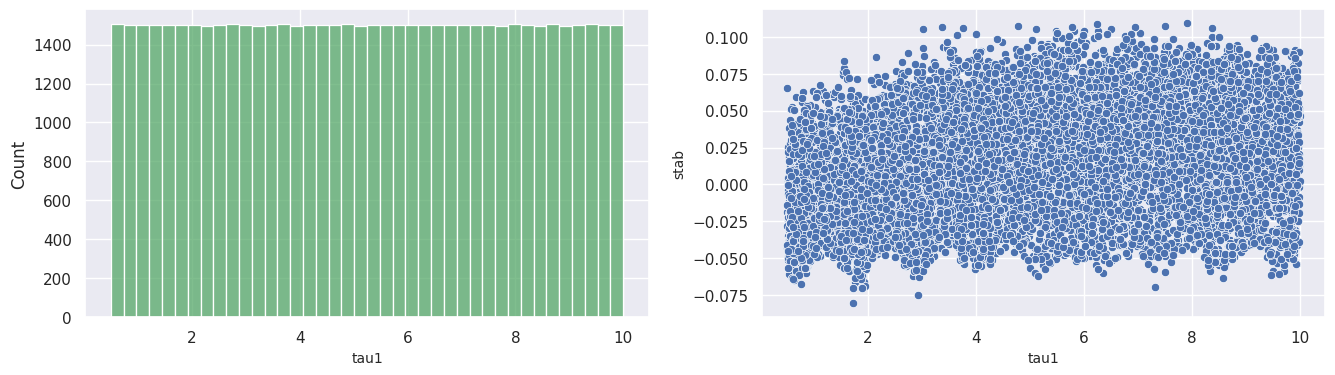

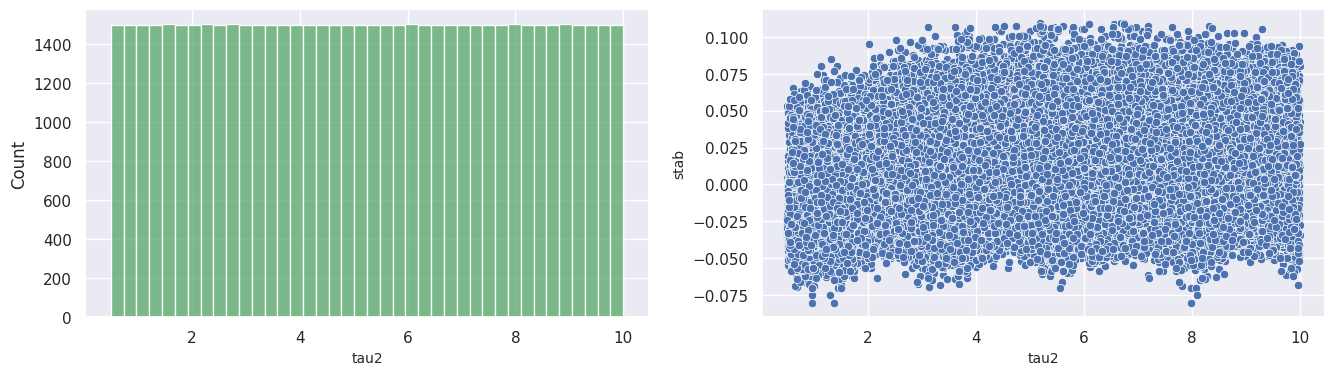

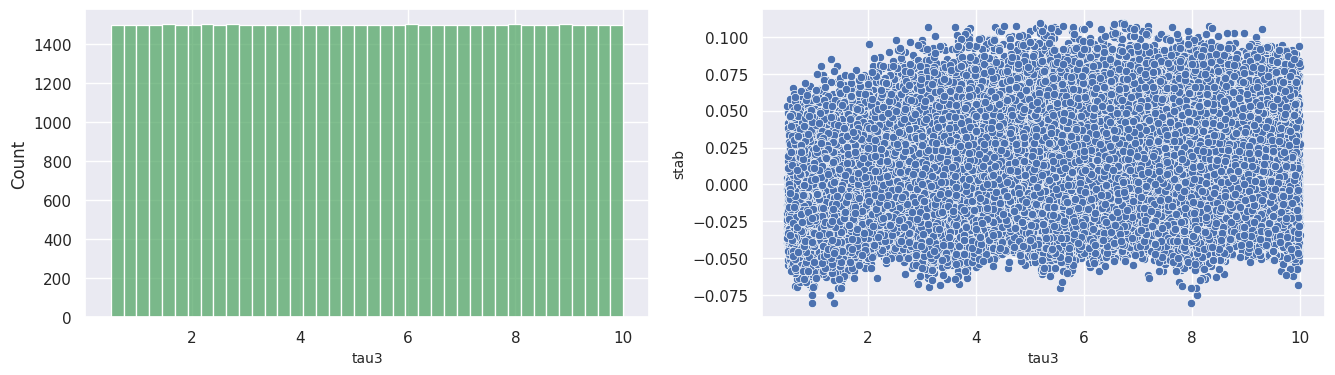

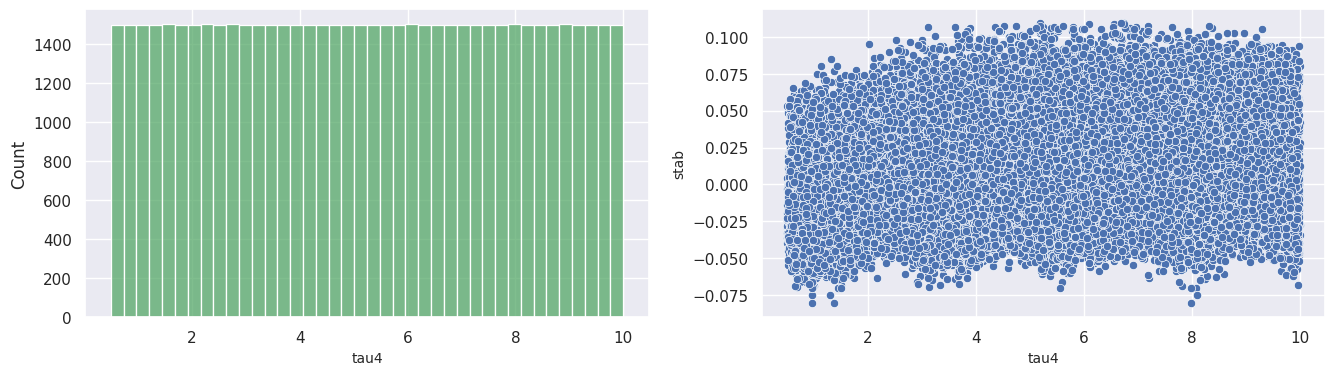

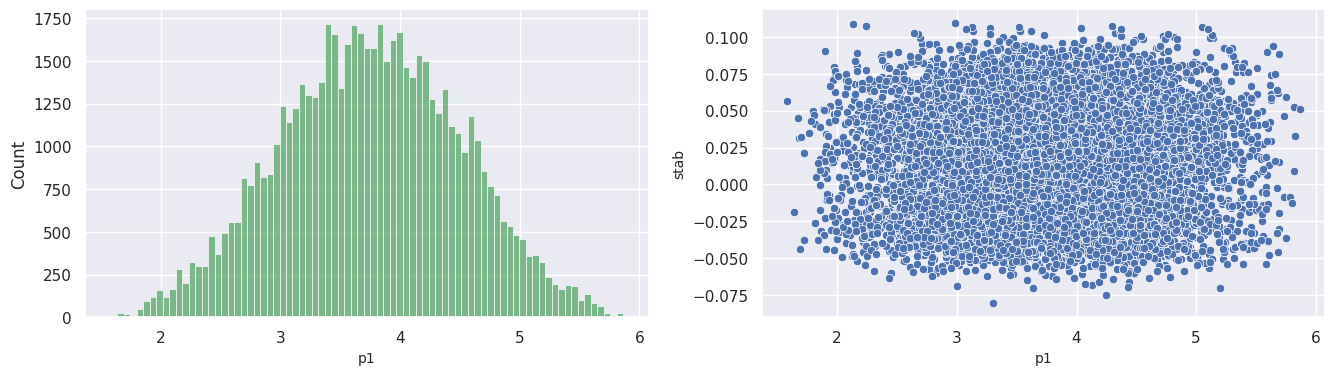

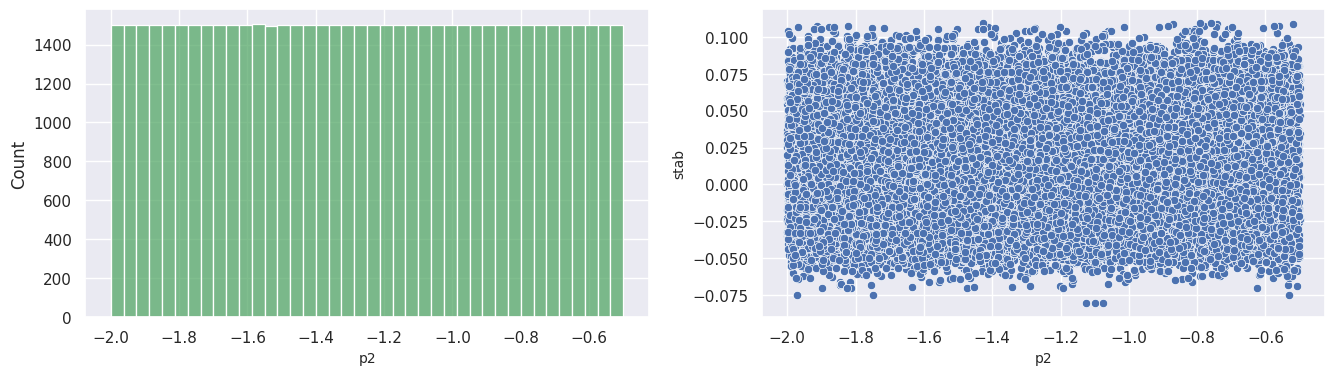

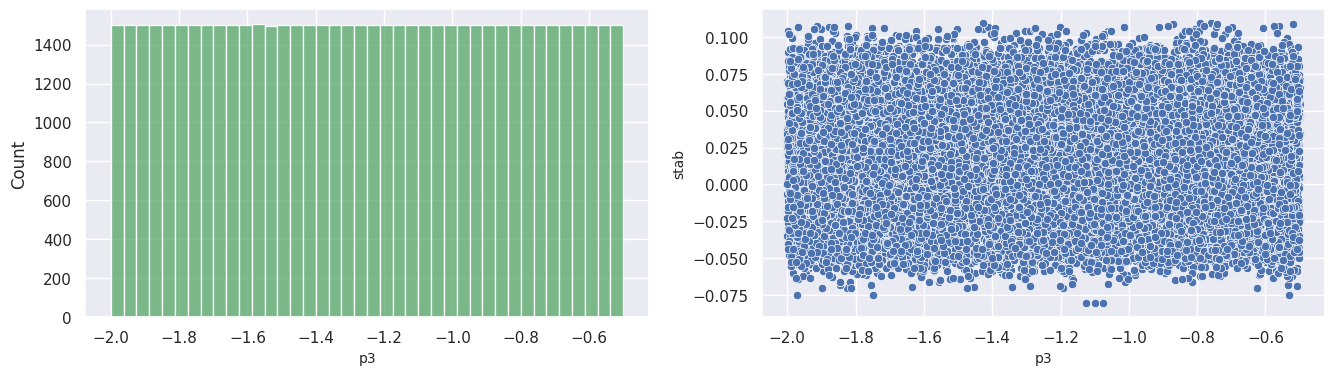

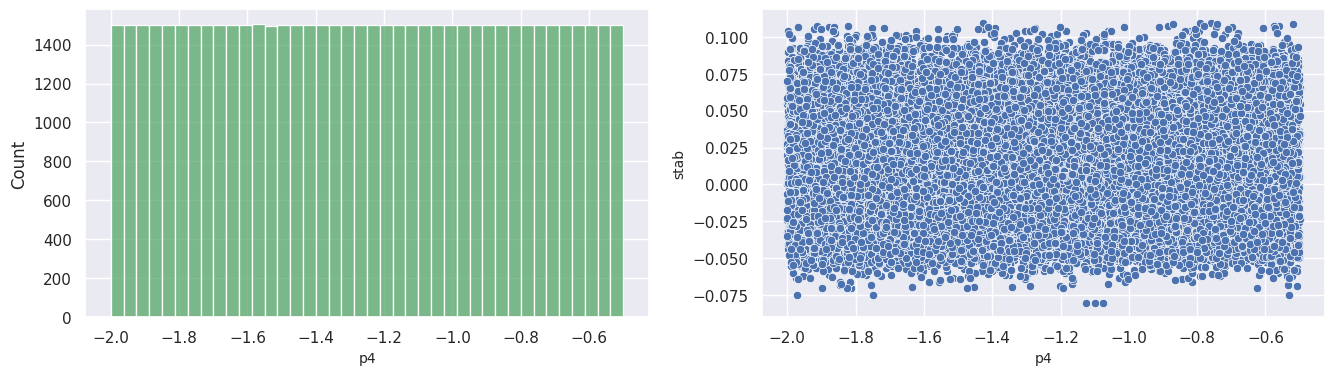

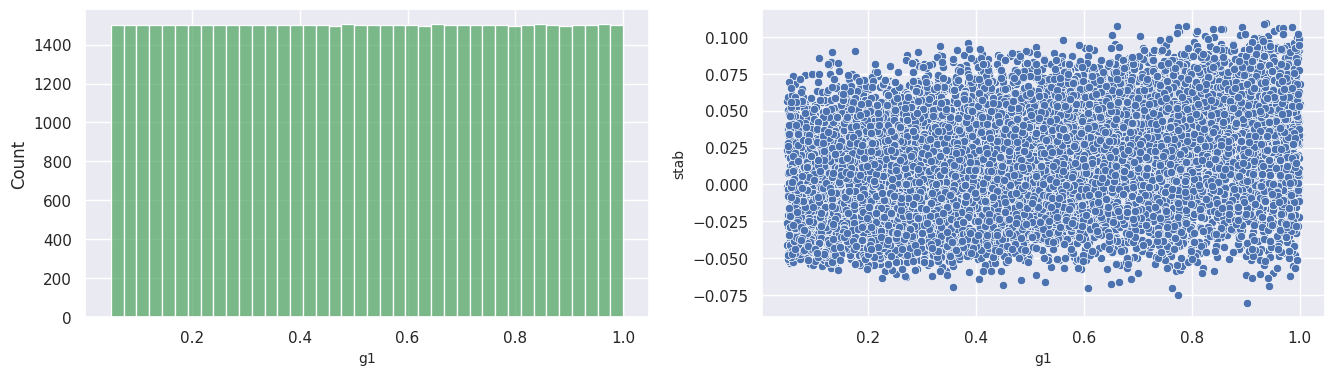

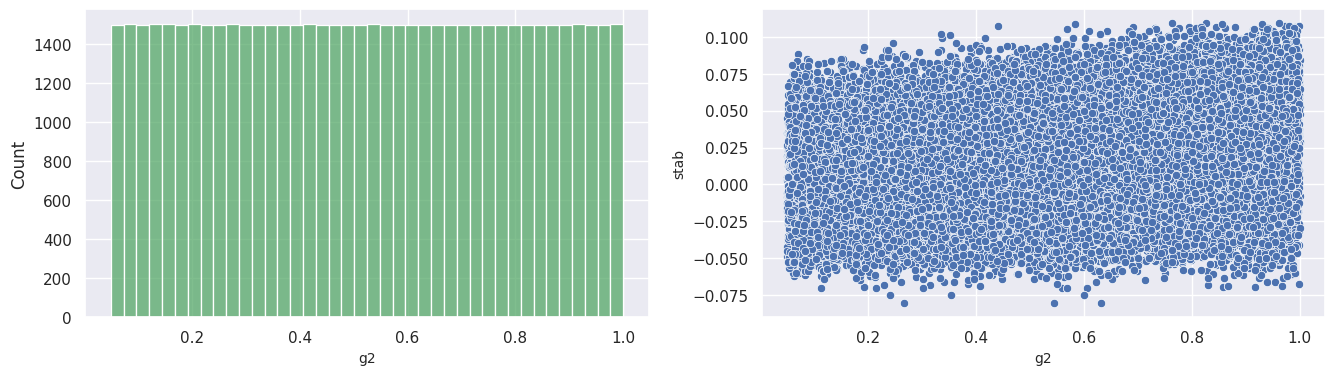

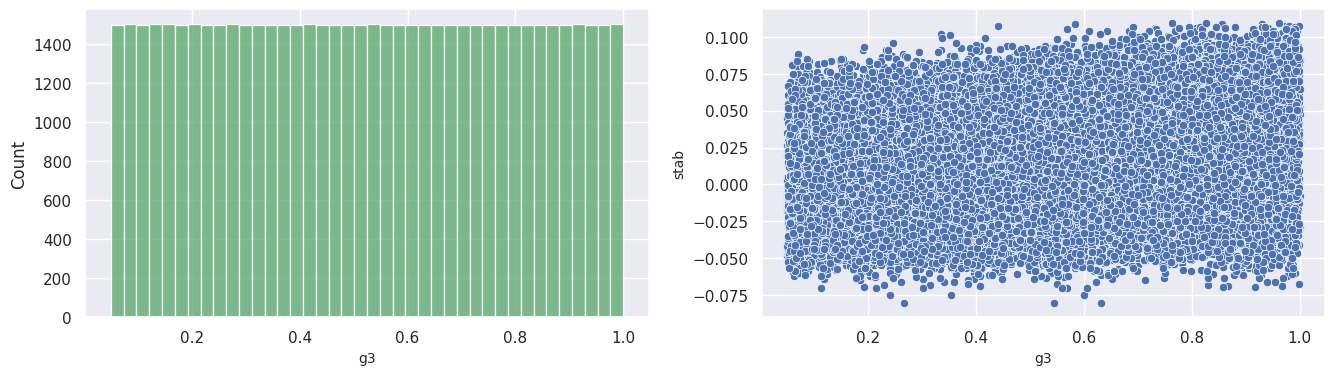

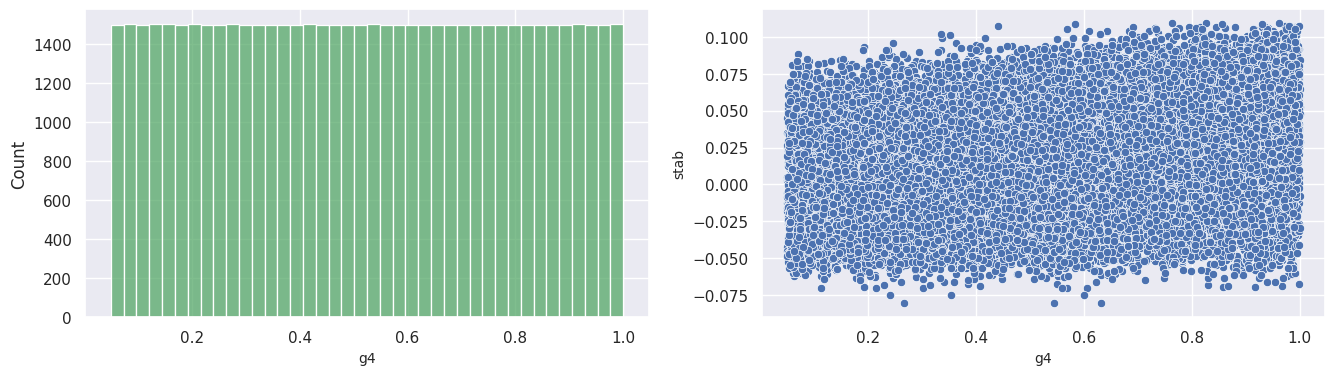

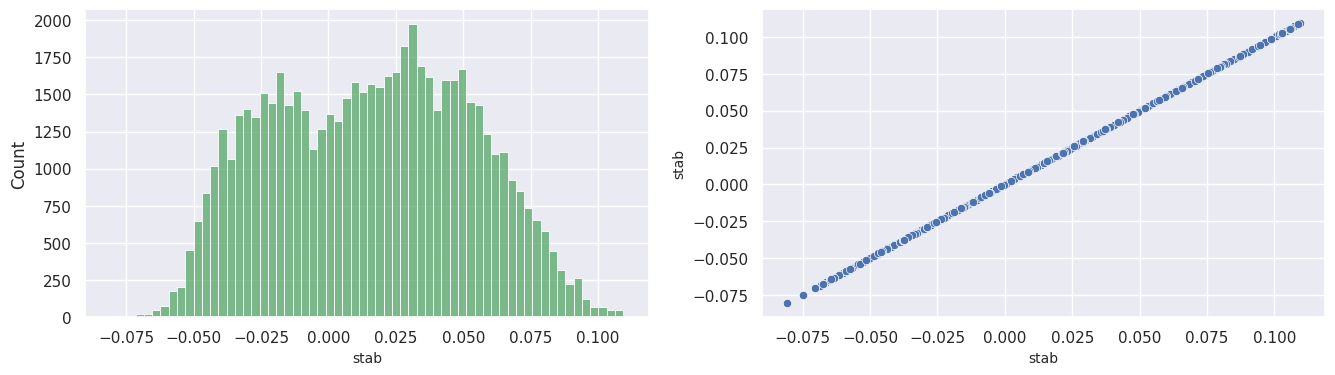

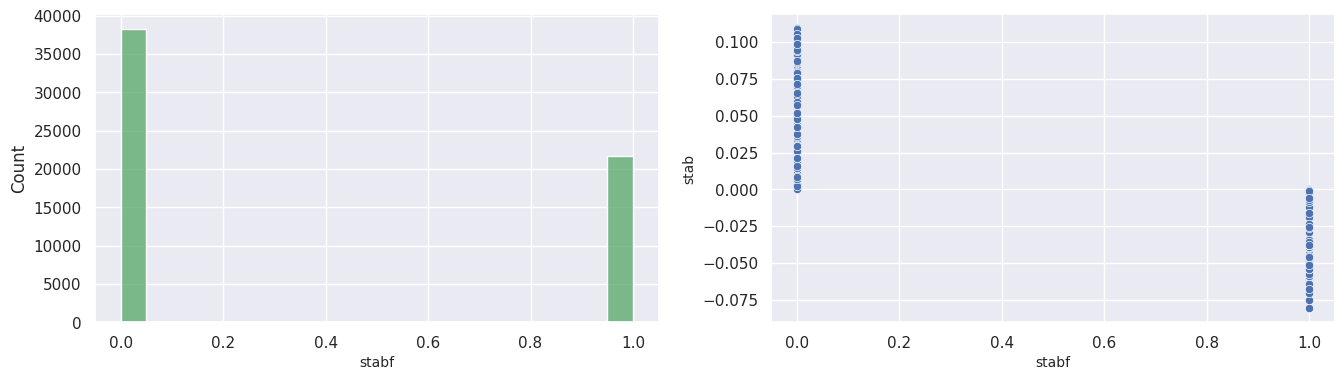

In [ ]:
for column in data.columns:
    assessment(data, 'stab', column, -1)

In [ ]:
data.p1.skew()

-0.012688423269883422

The data, derived from simulations with fixed feature ranges, shows uniform distributions except for 'p1' (the absolute sum of 'p2', 'p3', and 'p4'), which follows a normal distribution with a slight skew of -0.013.

<p style="text-align: justify">The proportion of observations related to 'unstable' and 'stable' scenarios is mapped.</p>

In [ ]:
print(f'Split of "unstable" (0) and "stable" (1) observations in the original dataset:')
print(data['stabf'].value_counts(normalize=True))

Split of "unstable" (0) and "stable" (1) observations in the original dataset:
stabf
0    0.638
1    0.362
Name: proportion, dtype: float64


> 64% data belongs to Unstable and 36% data belongs to Stable.



### Correlation

To verify the correlation between each numerical feature and the dependent variable, as well as between numerical features to avoid undesired collinearity. The heatmap below shows correlations between the dependent variable ('stabf') and 12 numerical features, including 'stab' for reference on its correlation with 'stabf'.

**Correlation Function:**

Develops and displays a heatmap plot referenced to a primary feature of a dataframe, highlighting the correlation among the 'n' mostly correlated features of the dataframe.
    
**Keyword arguments:**
    
- f_data: Tensor containing all relevant features, including the primary (Pandas dataframe)
- f_feature: The primary feature (String)
- f_index: The number of features most correlated to the primary feature.(Integer)
                

In [ ]:
def correlation_map(f_data, f_feature, f_number):
    # Find the top 'f_number' features most correlated with the primary feature
    f_most_correlated = f_data.corr().nlargest(f_number, f_feature).index
    f_correlation = f_data[f_most_correlated].corr()

    # Round the correlation values to 2 decimal places for better readability
    f_correlation_rounded = f_correlation.round(2)

    # Create a mask for the upper triangle
    f_mask = np.triu(np.ones_like(f_correlation_rounded, dtype=bool))

    # Plot the heatmap
    plt.figure(figsize=(12, 12))  # Adjusted size for better readability
    sns.heatmap(
        f_correlation_rounded,
        mask=f_mask,
        vmin=-1,
        vmax=1,
        annot=True,
        cmap="PRGn",
        center=0,
        square=True,
        annot_kws={"size": 10},
    )
    plt.title(f"Top {f_number} Features Correlated with '{f_feature}'", fontsize=14)
    plt.show()

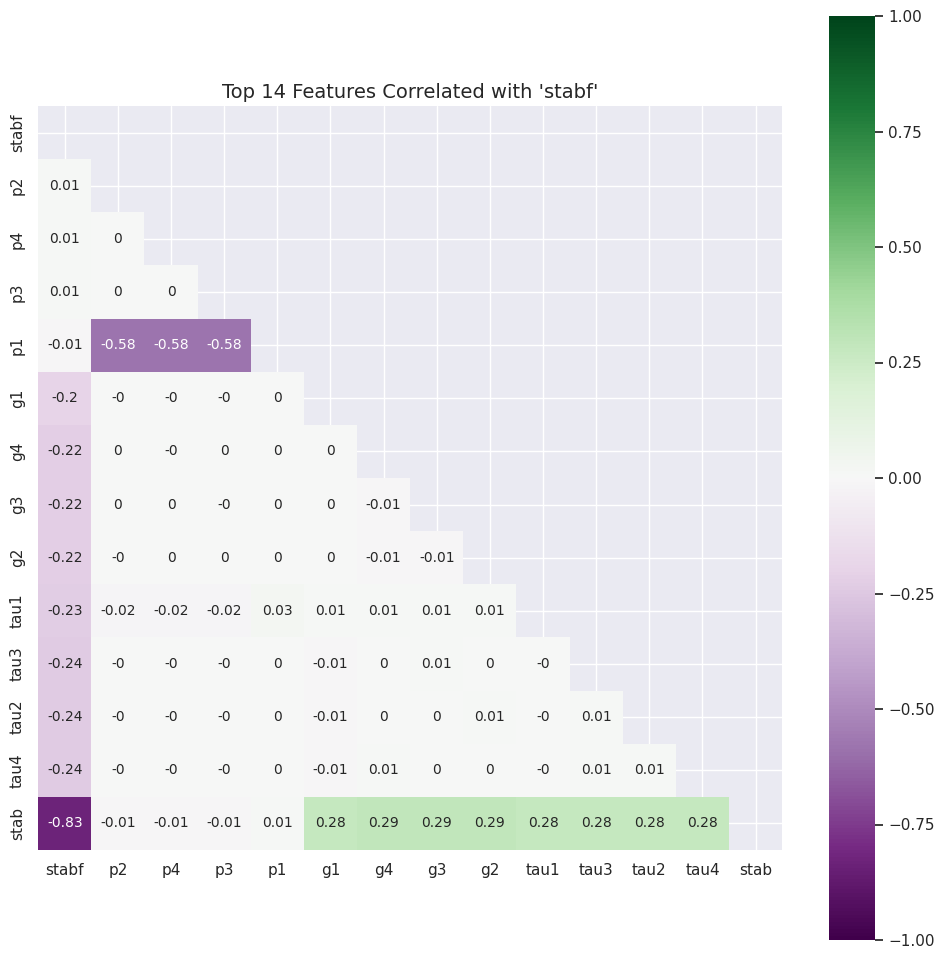

In [ ]:
correlation_map(data, 'stabf', 14)

Correlation between stab and stabf is significant (-0.83), as it should be, which reinforces the decision to drop it. Also, correlation between 'p1' and its components 'p2', 'p3' and 'p4' is above average, as expected, but not as high o justify any removal.

### Segregating train and test sets

The features dataset includes all 12 original predictive features, while the label dataset contains only 'stabf' (excluding 'stab').

The first 54,000 observations are used for training, and the last 6,000 for testing, as the dataset was pre-shuffled.

The distribution of 'stable' and 'unstable' observations in both sets was checked to ensure it matches the original dataset, which it does.

Finally, Pandas dataframes and series are converted to Numpy arrays for further use.

In [ ]:
X = data.iloc[:, :12]
y = data.iloc[:, 13]

X_training = X.iloc[:54000, :]
y_training = y.iloc[:54000]

X_testing = X.iloc[54000:, :]
y_testing = y.iloc[54000:]

ratio_training = y_training.value_counts(normalize=True)
ratio_testing = y_testing.value_counts(normalize=True)
ratio_training, ratio_testing


(stabf
 0    0.637444
 1    0.362556
 Name: proportion, dtype: float64,
 stabf
 0    0.643
 1    0.357
 Name: proportion, dtype: float64)

In [ ]:
X_training = X_training.values
y_training = y_training.values

X_testing = X_testing.values
y_testing = y_testing.values

### Feature scaling

In preparation for machine learning, scaling is performed based on (fitted to) the training set and applied (with the 'transform' method) to both training and testing sets.

In [ ]:
scaler = StandardScaler()
X_training = scaler.fit_transform(X_training)
X_testing = scaler.transform(X_testing)

## Deep Learning

In [ ]:
# ANN initialization
classifier = Sequential()

# Input layer (using Input layer to define input shape)
classifier.add(Input(shape=(12,)))  # Defining input shape as (12,)
classifier.add(Dense(units=24, kernel_initializer='uniform', activation='relu'))  # First hidden layer
classifier.add(Dense(units=24, kernel_initializer='uniform', activation='relu'))  # Second hidden layer
classifier.add(Dense(units=12, kernel_initializer='uniform', activation='relu'))  # Third hidden layer

# Single-node output layer
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))  # Output layer


In [ ]:
# ANN compilation
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Model fitting

A cross-validation approach is proposed, assuming the data is well-behaved and uniformly distributed. KFold is used with 10 validation sets.

In [ ]:
cross_val_round = 1
print(f'Model evaluation\n')

for train_index, val_index in KFold(10, shuffle=True, random_state=10).split(X_training):
    x_train, x_val = X_training[train_index], X_training[val_index]
    y_train ,y_val = y_training[train_index], y_training[val_index]
    classifier.fit(x_train, y_train, epochs=50, verbose=0)
    classifier_loss, classifier_accuracy = classifier.evaluate(x_val, y_val)
    print(f'Round {cross_val_round} - Loss: {classifier_loss:.4f} | Accuracy: {classifier_accuracy * 100:.2f} %')
    cross_val_round += 1

Model evaluation

169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9604 - loss: 0.0966
Round 1 - Loss: 0.0943 | Accuracy: 96.19 %
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9755 - loss: 0.0626
Round 2 - Loss: 0.0654 | Accuracy: 97.30 %
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9793 - loss: 0.0527
Round 3 - Loss: 0.0544 | Accuracy: 97.85 %
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9778 - loss: 0.0574
Round 4 - Loss: 0.0566 | Accuracy: 97.81 %
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9834 - loss: 0.0420
Round 5 - Loss: 0.0449 | Accuracy: 98.20 %
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9885 - loss: 0.0292
Round 6 - Loss: 0.0354 | Accuracy: 98.61 %
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9829 - loss: 0.0446
Round 7 - Loss: 0.0421 | Accuracy: 98.41 %
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9820 - loss: 0.0372
Round 8 - Loss: 0.0355 | Accuracy: 98.48 %
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/st

Here, we could see the accuracy of the model as 97.98%

### Predicting smart grid stability

<p style="text-align: justify">After fitting the model to the training set, it is time to extract predictions for the testing set and segregate those above the 'threshold' of 0.5 ('unstable' cases below the threshold, 'stable' cases above it).</p>

In [ ]:
y_pred = classifier.predict(X_testing)
y_pred[y_pred <= 0.5] = 0
y_pred[y_pred > 0.5] = 1

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


## Results

#### Model Performance

**Confusion Matrix**

In [ ]:
cm = pd.DataFrame(data=confusion_matrix(y_testing, y_pred, labels=[0, 1]),
                  index=["Actual Unstable", "Actual Stable"],
                  columns=["Predicted Unstable", "Predicted Stable"])
cm

,Predicted Unstable,Predicted Stable
Actual Unstable,3836,22
Actual Stable,99,2043


**Accuracy**

In [ ]:
print(f'Accuracy per the confusion matrix: {((cm.iloc[0, 0] + cm.iloc[1, 1]) / len(y_testing) * 100):.2f}%')

Accuracy per the confusion matrix: 97.98%


**Classification Report**

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_testing, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3858
           1       0.99      0.95      0.97      2142

    accuracy                           0.98      6000
   macro avg       0.98      0.97      0.98      6000
weighted avg       0.98      0.98      0.98      6000



**ROC-AUC Curve**

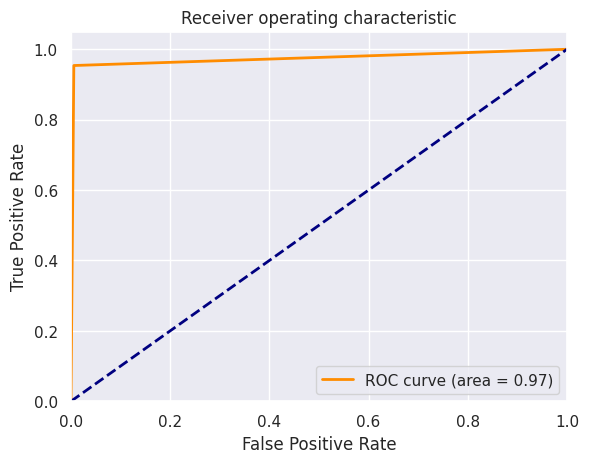

In [ ]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
fpr, tpr, thresholds = roc_curve(y_testing, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

The AUC value ranges from 0 to 1, where:
- AUC = 0.5 indicates random guessing (no better than chance).
- AUC = 1 indicates perfect classification with no errors.

An **AUC (Area Under the Curve) of 0.97** indicates that the model performs exceptionally well.
The model has high accuracy in distinguishing between 
positive and negative classes, indicating strong predictive power and minimal misclassification.


#### Model Deployment

In [ ]:
import joblib

# Save the model
joblib.dump(classifier, 'sgs-model.sav')

['sgs-model.sav']

In [ ]:
# Load the saved model
loaded_model = joblib.load('sgs-model.sav')

In [ ]:
# Function to get user input for a single data point

import numpy as np

def get_input():
    input_data = []
    features = ['tau1', 'tau2', 'tau3', 'tau4', 'p1', 'p2', 'p3', 'p4', 'g1', 'g2', 'g3', 'g4']
    for feature in features:
        while True:
            try:
                value = float(input(f"Enter value for {feature}: "))
                input_data.append(value)
                break
            except ValueError:
                print("Invalid input. Please enter a number.")
    return np.array(input_data).reshape(1, -1)

In [ ]:
# prediction loop

while True:
    # Get user input
    user_input = get_input()

    # Make prediction
    prediction = loaded_model.predict(user_input)

    # Print the prediction
    if prediction[0] == 0:
        print("Prediction: Unstable")
    else:
        print("Prediction: Stable")

    # Ask if the user wants to make another prediction
    another_prediction = input("Do you want to make another prediction? (yes/no): ")
    if another_prediction.lower() != 'yes':
        break

Enter value for tau1: 1.57
Enter value for tau2: 9.07
Enter value for tau3: 0.78
Enter value for tau4: 9.77
Enter value for p1: 2.97
Enter value for p2: -1.4
Enter value for p3: -1
Enter value for p4: -0.55
Enter value for g1: 0.6
Enter value for g2: 0.45
Enter value for g3: 0.7
Enter value for g4: 0.93
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Prediction: Stable
Do you want to make another prediction? (yes/no): no


Hence, our model is ready for prediction. Let's deploy it!!

## Summary

Key points of the deep learning exercise:

- Deep learning demonstrated excellent prediction accuracy for this application, even with minimal preprocessing of a well-behaved dataset. However, grid operators must assess if the accuracy meets real-world needs.
- Complex ANN architectures outperformed simpler ones.
- More epochs during training significantly improved prediction accuracy.
- To further validate the model, testing it on a new dataset with input parameters outside the original range would be beneficial.

_Notebook edited by Sarthak Narnor_